## Topic modeling on `title`
What are the domains of research?

In [57]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from gensim.corpora import Dictionary
from gensim.models import LdaModel
import nltk
from nltk.corpus import stopwords
import pandas as pd
from gensim.models.coherencemodel import CoherenceModel
import numpy as np
import matplotlib.pyplot as plt


In [7]:
# !pip install scikit-learn

In [10]:
# !pip install gensim

In [40]:
# !pip install nltk

     ---------------------------------------- 0.0/42.0 kB ? eta -:--:--
     --------- ------------------------------ 10.2/42.0 kB ? eta -:--:--
     --------------------------- ---------- 30.7/42.0 kB 262.6 kB/s eta 0:00:01
     -------------------------------------- 42.0/42.0 kB 337.6 kB/s eta 0:00:00
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   -- ------------------------------------- 0.1/1.5 MB 201.8 kB/s eta 0:00

In [32]:
df = pd.read_csv("data/cleaned/pubs.csv")

C:\Users\20211831\AppData\Local\Temp\ipykernel_1340\887412386.py:1: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("data/cleaned/pubs.csv")


### Whole dataset

In [34]:
vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
X = vectorizer.fit_transform(df['title'])

lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(X)

LatentDirichletAllocation(n_components=5, random_state=42)

In [35]:
# top words for each topic
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        message = f"Topic #{topic_idx}: "
        message += " ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]])
        print(message)

print("\nTopics found via LDA (Scikit-learn):")
print_top_words(lda, vectorizer.get_feature_names_out(), n_top_words=5)

# using gensim for topic modeling
documents = df['title'].apply(lambda x: x.split())
dictionary = Dictionary(documents)
corpus = [dictionary.doc2bow(doc) for doc in documents]

lda_gensim = LdaModel(corpus, num_topics=5, id2word=dictionary, passes=15)

print("\nTopics found via LDA (Gensim):")
for idx, topic in lda_gensim.print_topics(-1):
    print(f"Topic: {idx} \nWords: {topic}")



Topics found via LDA (Scikit-learn):
Topic #0: treatment cancer disease clinical care
Topic #1: van en het een naar
Topic #2: design based systems analysis study
Topic #3: modelling water analysis change optimization
Topic #4: high study dynamics based transport

Topics found via LDA (Gensim):
Topic: 0 
Words: 0.066*"of" + 0.057*"and" + 0.056*"in" + 0.050*"the" + 0.028*":" + 0.021*"a" + 0.016*"The" + 0.015*"on" + 0.014*"to" + 0.009*"A"
Topic: 1 
Words: 0.058*"van" + 0.052*"de" + 0.043*"en" + 0.042*"in" + 0.023*":" + 0.020*"het" + 0.017*"een" + 0.012*"De" + 0.009*"naar" + 0.008*"Een"
Topic: 2 
Words: 0.031*"for" + 0.011*"dairy" + 0.011*"modelling" + 0.007*"with" + 0.005*"fish" + 0.005*"behavior" + 0.005*"Aspergillus" + 0.005*"using" + 0.005*"surface" + 0.005*"economic"
Topic: 3 
Words: 0.068*"and" + 0.059*"in" + 0.046*"of" + 0.021*"for" + 0.014*":" + 0.011*"the" + 0.010*"with" + 0.010*"to" + 0.006*"treatment" + 0.006*"on"
Topic: 4 
Words: 0.091*"of" + 0.057*"and" + 0.038*"the" + 0.035*

### English publications
Not deleting duplicates as there are of a small significance

In [36]:
df_en = df[df['language'] == "en"]

In [37]:
vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
X = vectorizer.fit_transform(df_en['title'])

lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(X)

LatentDirichletAllocation(n_components=5, random_state=42)

In [38]:
# top words for each topic
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        message = f"Topic #{topic_idx}: "
        message += " ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]])
        print(message)

print("\nTopics found via LDA (Scikit-learn):")
print_top_words(lda, vectorizer.get_feature_names_out(), n_top_words=5)

# using gensim for topic modeling
documents = df_en['title'].apply(lambda x: x.split())
dictionary = Dictionary(documents)
corpus = [dictionary.doc2bow(doc) for doc in documents]

lda_gensim = LdaModel(corpus, num_topics=5, id2word=dictionary, passes=15)

print("\nTopics found via LDA (Gensim):")
for idx, topic in lda_gensim.print_topics(-1):
    print(f"Topic: {idx} \nWords: {topic}")


Topics found via LDA (Scikit-learn):
Topic #0: social development study learning dutch
Topic #1: care health treatment patients quality
Topic #2: design systems based analysis data
Topic #3: disease cancer cell clinical imaging
Topic #4: water production study synthesis effects

Topics found via LDA (Gensim):
Topic: 0 
Words: 0.038*"in" + 0.016*":" + 0.013*"production" + 0.013*"of" + 0.013*"and" + 0.012*"water" + 0.011*"by" + 0.010*"soil" + 0.008*"cell" + 0.008*"van"
Topic: 1 
Words: 0.066*"and" + 0.059*"in" + 0.056*"of" + 0.039*"the" + 0.026*":" + 0.018*"a" + 0.017*"to" + 0.014*"on" + 0.013*"The" + 0.011*"for"
Topic: 2 
Words: 0.099*"of" + 0.063*"and" + 0.063*"the" + 0.050*"in" + 0.019*"The" + 0.016*"on" + 0.007*"to" + 0.007*"a" + 0.006*":" + 0.006*"role"
Topic: 3 
Words: 0.014*"for" + 0.013*"and" + 0.009*"in" + 0.009*"Essays" + 0.009*"en" + 0.008*"=" + 0.007*"on" + 0.007*"forest" + 0.005*"sensing" + 0.004*"market"
Topic: 4 
Words: 0.060*"and" + 0.059*"of" + 0.037*"in" + 0.035*"for" 

The 5 topic categories look distinct (Gensim gives BoW format)

#### Excluding words like "study" and "analysis"
Chosen **manually**
Running for optimal number of topics chosen below

In [54]:
nltk.download('stopwords')
additional_stopwords = ['study', 'analysis', 'research', 'examination', 'survey', 'exploration', 'inquiry', 'review', 'experiment', 'evaluation'
                        'assessment', 'scrutiny', 'breakdown', 'review']
stop_words = stopwords.words('english') + additional_stopwords

vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words=stop_words)
X = vectorizer.fit_transform(df_en['title'])

lda = LatentDirichletAllocation(n_components=6, random_state=42)
lda.fit(X)

def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        message = f"Topic #{topic_idx}: "
        message += " ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]])
        print(message)

print("\nTopics found via LDA (Scikit-learn) with customized stop words:")
print_top_words(lda, vectorizer.get_feature_names_out(), n_top_words=5)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\20211831\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!



Topics found via LDA (Scikit-learn) with customized stop words:
Topic #0: learning based development self life
Topic #1: cancer treatment disease clinical cell
Topic #2: systems design based control high
Topic #3: de van making decision en
Topic #4: water development change plant climate
Topic #5: care health management risk social


Topic 3 - wrong labeling?

#### Choosing optimal number of topics
Evaluating the semantic coherence of the words within each topic (calculating coherence scores, choosing max)

In [52]:
# using gensim for topic modeling
documents = df_en['title'].apply(lambda x: x.split())
dictionary = Dictionary(documents)
corpus = [dictionary.doc2bow(doc) for doc in documents]

# coherence scores for different numbers of topics
def compute_coherence_scores(corpus, dictionary, texts, max_topics=10):
    coherence_scores = []
    for num_topics in range(1, max_topics + 1):
        lda_model = LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=15)
        coherence_model_lda = CoherenceModel(model=lda_model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_score = coherence_model_lda.get_coherence()
        coherence_scores.append(coherence_score)
    return coherence_scores

max_topics = 10
coherence_scores = compute_coherence_scores(corpus, dictionary, documents, max_topics=max_topics)

print("Coherence scores:")
for num_topics, score in enumerate(coherence_scores, start=1):
    print(f"Number of Topics: {num_topics}, Coherence Score: {score}")

Coherence scores:
Number of Topics: 1, Coherence Score: 0.33561754606984506
Number of Topics: 2, Coherence Score: 0.3134011206028232
Number of Topics: 3, Coherence Score: 0.3453228461029451
Number of Topics: 4, Coherence Score: 0.30381926781081225
Number of Topics: 5, Coherence Score: 0.34143478863973903
Number of Topics: 6, Coherence Score: 0.38219115357805755
Number of Topics: 7, Coherence Score: 0.2937096671060991
Number of Topics: 8, Coherence Score: 0.3287200899491447
Number of Topics: 9, Coherence Score: 0.35811606529523604
Number of Topics: 10, Coherence Score: 0.30622720643772816


In [53]:
# Number of Topics: 6, Coherence Score: 0.38219115357805755

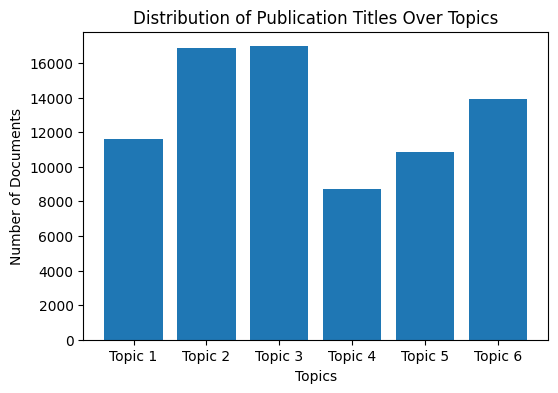

In [59]:
# topic proportions for each document
topic_proportions = lda.transform(X)

# plotting the distribution 
plt.figure(figsize=(6, 4))
topics = [f'Topic {i+1}' for i in range(lda.n_components)]
plt.bar(topics, topic_proportions.sum(axis=0))
plt.xlabel('Topics')
plt.ylabel('Number of Documents')
plt.title('Distribution of Publication Titles Over Topics')
plt.show()

Assessing the certainty of topic assignments across documents - calculating entropy. Entropy quantifies the spread or concentration of topic proportions within documents - the smaller entropy the better.

In [71]:
# entropy of topic proportions across documents
def calculate_entropy(topic_proportions):
    entropy = np.sum(-topic_proportions * np.log(topic_proportions), axis=1)
    return entropy

entropy = calculate_entropy(topic_proportions)
average_entropy = np.mean(entropy)
print(average_entropy)

0.8876437828549221


In [70]:
# mean entropy for documents classified under each topic
def mean_entropy_per_topic(topic_proportions, topics):
    mean_entropy_per_topic = {}
    for i, topic in enumerate(topics):
        topic_indices = np.argmax(topic_proportions, axis=1) == i  # documents classified under current topic
        mean_entropy_per_topic[topic] = np.mean(calculate_entropy(topic_proportions[topic_indices]))
    return mean_entropy_per_topic

topics = ['Topic 1', 'Topic 2', 'Topic 3', 'Topic 4', 'Topic 5', 'Topic 6']

mean_entropy_per_topic = mean_entropy_per_topic(topic_proportions, topics)
print("Mean Entropy per Topic:")
for topic, mean_entropy in mean_entropy_per_topic.items():
    print(f"{topic}: {mean_entropy}")

Mean Entropy per Topic:
Topic 1: 0.908384187981635
Topic 2: 0.8747399162389898
Topic 3: 0.8674276053626856
Topic 4: 0.9343486131046066
Topic 5: 0.9206527655527383
Topic 6: 0.8686040856347055


Best distribution for Topic 3 and 6